In [235]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

**important note**: 
i did not save the variables for plotting, so if you run the code you wont get all the plots,instead you will get the latest one.
so please consider that before running the code.

In [251]:
def init_map(num):
    tsp_map = np.zeros((num,num))
    for i in range(num):
        for j in range(i):
            tsp_map[i][j] = np.floor(np.random.random() * 100)
            tsp_map[j][i] = tsp_map[i][j]
    return tsp_map

def init_phermone(n):
    phermone = np.zeros((n,n))
    for i in range(n):
        for j in range(i):
            phermone[i][j] = (np.random.random())
            phermone[j][i] = phermone[i][j]
    return phermone

In [294]:
map_len = 20
tsp = init_map(map_len)
phermone = init_phermone(map_len)

In [295]:
class Ant :
    path = []
    path_cost = 0
    def __init__(self, alpha , beta , map_len, position=0):
        self.alpha = alpha
        self.beta = beta
        self.position = position
        self.path = [position]
        self.path_cost = 0
        self.not_path = np.arange(1,map_len)
#         self.not_path = self.update_not_path()
        
        
    def update_not_path(self):
        index = self.path[-1]
        for i in range(len(self.not_path)):
            if index == self.not_path[i]:
                self.not_path = np.delete(self.not_path, i)
                return False
        
        
    def add_path(self, pos, tsp):
        self.path_cost += tsp[self.path[-1], pos]
        self.path.append(pos)
        self.update_not_path()
           

        
    def calc(self, phermone, tsp):
        start = self.path[-1]
        s = 0
        probs =[]
        for i in self.not_path:
            s += ( np.power(phermone[start,i],self.alpha) * np.power(100/(tsp[start,i] + 1),self.beta))
#             print( np.power(phermone[start,i],self.alpha), phermone[start,i],)

        for i in self.not_path:
            probs.append(( np.power(phermone[start,i],self.alpha) * np.power(100/(tsp[start,i] + 1),self.beta)) / s ) 
        return np.array(probs)
    
    def update_phermone(self, tsp, phermone, evaporation_rate =0.2 ):
        fate = np.random.random()
        rate = 1 - evaporation_rate
        phermone = np.array(phermone)
        for i in range(len(self.path) - 1):
            start = self.path[i]
            end = self.path[i + 1]
            if fate > rate :
                phermone[start, end] += 120/self.path_cost
        return phermone
    
    
    def update_phermone2(self, tsp, phermone, evaporation_rate =0.2 ):
        fate = np.random.random()
        rate = 1 - evaporation_rate
        phermone = np.array(phermone)
        for i in range(len(self.path) - 1):
            start = self.path[i]
            end = self.path[i + 1]
            if fate > rate :
                phermone[start, end] += 100
        return phermone
    
    
    def update_phermone3(self, tsp, phermone, evaporation_rate =0.2 ):
        fate = np.random.random()
        rate = 1 - evaporation_rate
        phermone = np.array(phermone)
        for i in range(len(self.path) - 1):
            start = self.path[i]
            end = self.path[i + 1]
            if fate > rate:
                phermone[start, end] += 100 / tsp[start,end]
        return phermone
    
    
    def re_run(self):
        self.not_path = np.arange(1,len(self.path))
        self.path = [0]
        self.path_cost = 0
        
        
        
class Colony : 
    def __init__(self,n_ants,alpha , beta, map_len, position=0):
        self.members = np.empty(n_ants, dtype=object)
        for i in range(n_ants):
            self.members[i] = Ant(alpha, beta, map_len,position )
    
    def gen_best(self):
        return min(self.members,key= lambda x:x.path_cost).path_cost
    
    def gen_avg(self):
        arr = []
        for ant in self.members:
            arr.append(ant.path_cost)
#         print(arr)
        arr = np.array(arr)
        return np.mean(arr)
            
        
            
        
    
        
        

In [296]:
n_ants = 200
evaporation_rate = 0.4
alpha = 1
beta = 5
colony = Colony(n_ants, alpha, beta, map_len)

In [297]:
for i in range(n_ants):
    colony.members[i] = Ant(alpha, beta ,map_len, position=0)

In [298]:
avg_plot = []
best_plot = []

In [299]:
for t in range(1000):  
    for ant in colony.members:
        
        while(len(ant.path) < map_len):
            probs = np.array(ant.calc(phermone,tsp))
            next_node = np.random.choice(ant.not_path, p=probs)
            ant.add_path(next_node,tsp)
        
    avg_plot.append(colony.gen_avg())
    best_plot.append(colony.gen_best())
    for ant in colony.members:
        phermone= ant.update_phermone(tsp, phermone)
        ant.re_run()


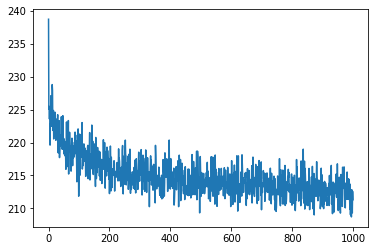

In [300]:
#map_len = 20 , alpha =1 ,beta = 5 , evaporation_rate = 0.4
plt.plot(avg_plot)

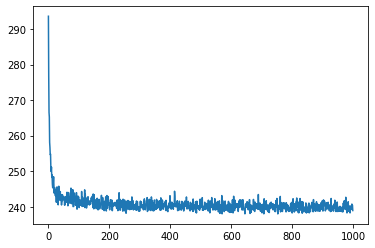

In [274]:
#map_len=10 alpha = 1 ,beta =3 ,method=1, evap_rate = 0.3
plt.plot(avg_plot)

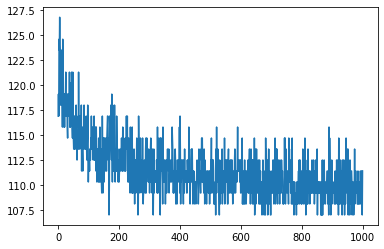

In [260]:
#Map_size = 5, method = 2 , alpha =1 ,beta=2 
plt.plot(avg_plot)

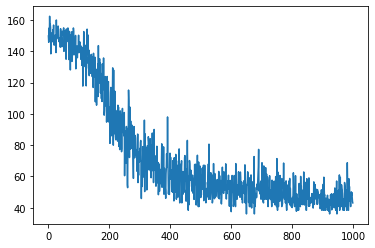

In [250]:
#(simple graph with simpler system) alpha =1 beta =0 method = 3 
plt.plot(avg_plot)

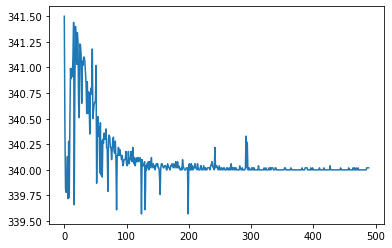

In [226]:
#map_size 20 alpha=2, beta = 5, method= 1
plt.plot(avg_plot)

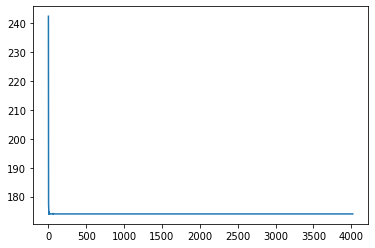

In [187]:

#map size = 20, alpha=6 , beta=1, evaporation_rate = 0.2 ,method1:as expected ants do not explore a lot(or maybe its just a weird random tsp idk)
plt.plot(avg_plot)

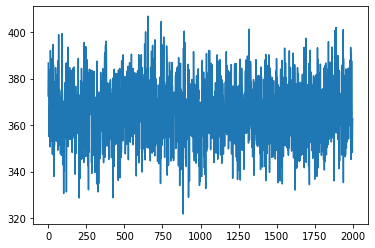

In [237]:


#ACS beta = 0, alpha = 1,method 1, map_len = 10, evaporation_rate = 0.4
plt.plot(avg_plot)

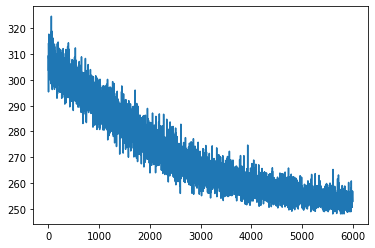

In [226]:
#alpha =2 beta =3 ,ACS system , method1 , map_len = 10
plt.plot(avg_plot)


**Conclusion:**


Usually with bigger beta ants tend to "explore" more and with lower alpha ants will find a (usually sub-optimal) path faster.
for simple problems acs system (method 3) will work but for more complex graphs we need to use method 3 with higher values of beta
so that we dont get stuck in a local minimum.
Optimal performance of ACS mainly depended on suitable parameters. However, the parameters were coupled with each other, and the potential number of parameters was large, presenting a considerable challenge for ACS parameter selection.